In [3]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
# library(xkcd)
# library(sysfonts)

source("../../../spydr_scripts/functions/get_os.R")
source("../../../spydr_scripts/functions/median_cl_boot.R")

In [2]:
#get correct home path based on os 
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/Krista/'}

agg_data_path = paste0(home,'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

fig_path = paste0(home,'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/figures/')

In [5]:

vB_reg_obs_data <- read_csv('vB_reg_data.csv',col_types = cols())
gen_reg_obs_data <- read_csv('gen_obs_reg_data.csv',col_types = cols())

sim_data <- read_csv('probC_sim_learning_signals_processed.csv',col_types = cols())

Warning message:
“Missing column names filled in: 'X1' [1]”Warning message:
“Duplicated column names deduplicated: 'ID' => 'ID_1' [30], 'cpp' => 'cpp_1' [32], 'ideal_B' => 'ideal_B_1' [34], 'trial' => 'trial_1' [43]”Warning message:
“Missing column names filled in: 'X1' [1]”Warning message:
“Duplicated column names deduplicated: 'ID' => 'ID_1' [30], 'cpp' => 'cpp_1' [32], 'ideal_B' => 'ideal_B_1' [34], 'trial' => 'trial_1' [43]”

In [ ]:
sim_data['shifted_epoch_trial_zero_idx'] = reg_obs_data['shifted_epoch_trial_zero_idx']

In [ ]:
# reg_obs_data$p_id_acc = as.numeric(reg_obs_data$response == reg_obs_data$stimulus)

In [ ]:
head(reg_obs_data)

In [ ]:
shifted = reg_obs_data[reg_obs_data$shifted_epoch_trial_zero_idx == 0 & reg_obs_data$epoch_trial_zero_idx == 0, 'shifted_epoch_trial_zero_idx']

In [ ]:
which(reg_obs_data$epoch_trial_zero_idx == 0 & reg_obs_data$shifted_epoch_trial_zero_idx != reg_obs_data$epoch_trial_zero_idx)

In [ ]:
names(reg_obs_data)

In [ ]:
nrow(shifted); sum(reg_obs_data$cp_with_slow_fast)

In [ ]:
reg_obs_data

In [ ]:
reg_obs_data[(reg_obs_data$shifted_epoch_trial_zero_idx > -5 & reg_obs_data$shifted_epoch_trial_zero_idx < 5 ), c('epoch_trial_zero_idx', 'shifted_epoch_trial_zero_idx')]

In [ ]:
head(reg_obs_data, 50)
names(reg_obs_data)


In [ ]:
plot(subset(reg_obs_data$epoch_trial_zero_idx, ID == 761))

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 & epoch_trial_zero_idx == 1 ), aes(epoch_n, cpp)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 & epoch_trial_zero_idx == 0 ), aes(epoch_n, cpp)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

In [ ]:
head(sim_data)

In [ ]:
ggplot(subset(sim_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, acc)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)  + facet_grid(.~cond)

In [ ]:
ggplot(subset(sim_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, gen_drift)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)  + facet_grid(.~cond)

In [ ]:
ggplot(subset(sim_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, gen_bound)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)  + facet_grid(.~cond)

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 & epoch_n == 10), aes(shifted_epoch_trial_zero_idx, rt)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, rt, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) + facet_grid(.~condition)  

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 &( condition == 'lc'|condition=='hc')), aes(shifted_epoch_trial_zero_idx, rt, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 &( condition == 'lv'|condition=='hv')), aes(shifted_epoch_trial_zero_idx, rt, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

In [ ]:
ggplot(subset(vB_reg_obs_data, shifted_epoch_trial > -2 & shifted_epoch_trial < 9 &( condition == 'lv'|condition=='hv')), aes(shifted_epoch_trial, v_reg, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

Warning message:
“Removed 48 rows containing non-finite values (stat_summary).”

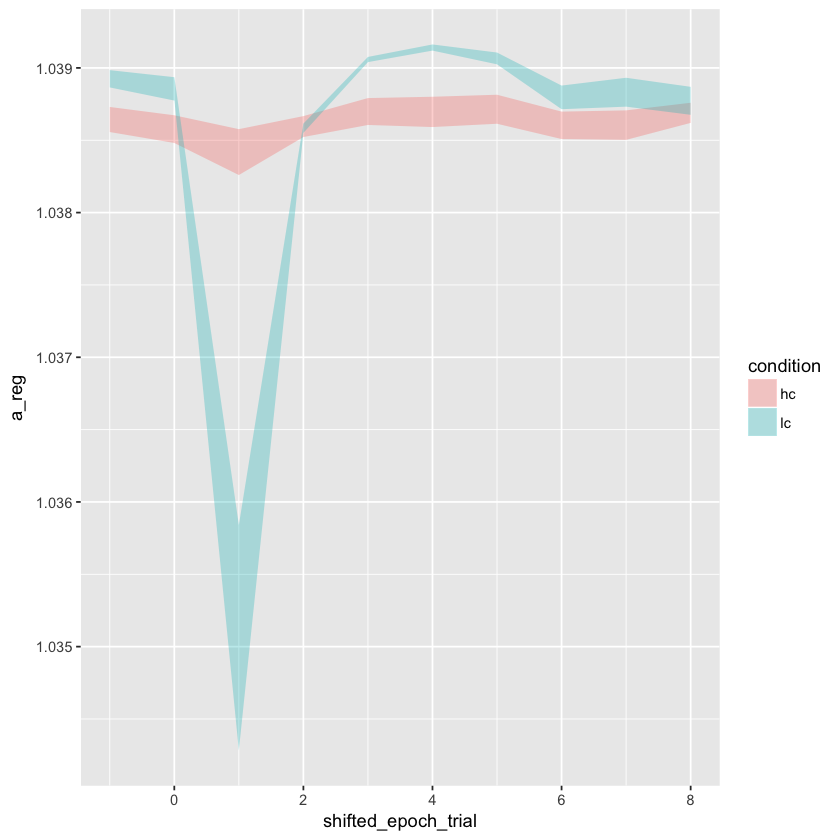

In [8]:
ggplot(subset(gen_reg_obs_data, shifted_epoch_trial > -2 & shifted_epoch_trial < 9 &( condition == 'lc'|condition=='hc')), aes(shifted_epoch_trial, a_reg, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

Warning message:
“Removed 48 rows containing non-finite values (stat_summary).”

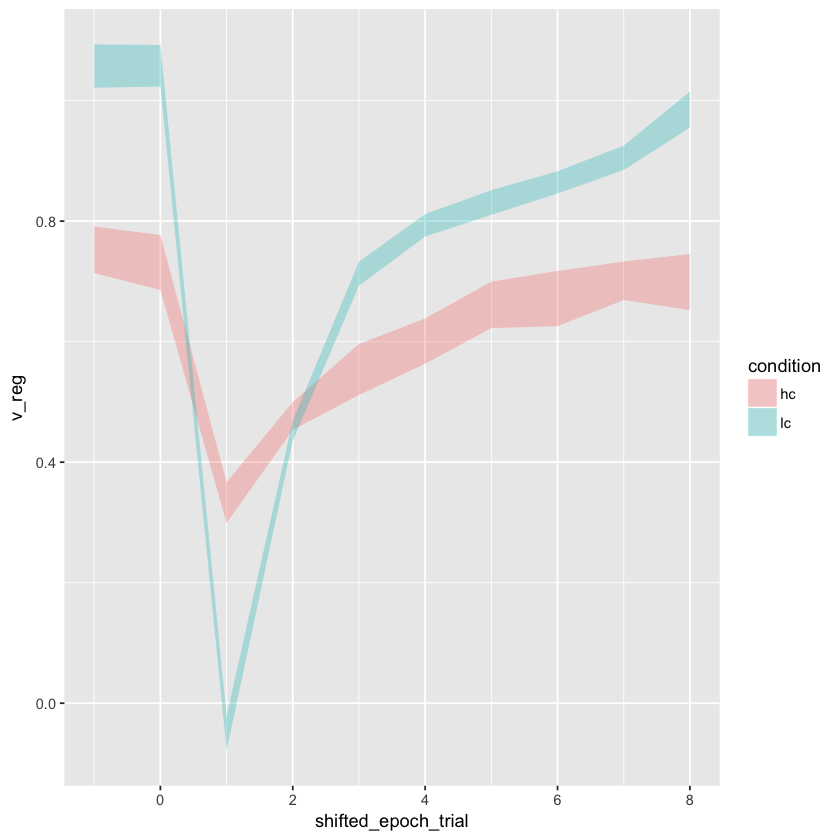

In [9]:
ggplot(subset(gen_reg_obs_data, shifted_epoch_trial > -2 & shifted_epoch_trial < 9 &( condition == 'lc'|condition=='hc')), aes(shifted_epoch_trial, v_reg, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

In [ ]:
# test = subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 10 &( condition == 'lc'|condition=='hc'))

# # x = aov(rt~subj_idx*condition, data=test)
# # summary(x)

# # x = aov(p_id_acc~subj_idx*condition, data=test)
# # summary(x)

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 10 &( condition == 'lv'|condition=='hv')), aes(shifted_epoch_trial_zero_idx, p_id_acc, fill=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 &( condition == 'lc'|condition=='hc')), aes(shifted_epoch_trial_zero_idx, p_id_acc, fill=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, rt)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) + facet_grid(.~condition)  

In [ ]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, cpp)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) + facet_grid(.~condition)  

In [ ]:
reg_obs_data$subj_idx <-factor(reg_obs_data$subj_idx)

In [ ]:
#sanity check
aov.rt=aov(formula = rt~condition + Error(subj_idx/condition), data=reg_obs_data)
summary(aov.rt)

pairwise.t.test(reg_obs_data$rt,reg_obs_data$condition, p.adj = "bonferroni")

In [ ]:
model.tables(aov.rt, type = 'means')

In [ ]:
names(reg_obs_data)

In [ ]:
#when the stimulus is 0 and the response is 0 (when correct), take abs. val of drift rate 
reg_obs_data['v_reg_flipped'] = reg_obs_data$v_reg
reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'v_reg_flipped'] = abs(reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'v_reg'])

In [ ]:
#when the stimulus is 0 and the response is 0 (when correct), take abs. val of B
reg_obs_data['B_flipped'] = reg_obs_data$B
reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'B_flipped'] = abs(reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'B'])

In [ ]:
reg_obs_data['accuracy'] = as.numeric(reg_obs_data$response == reg_obs_data$stimulus)
reg_obs_data['trial'] = rep(1:600, 24*4)

In [ ]:
#sanity checks 
ggplot(reg_obs_data, aes(cp_with_slow_fast, fill=condition)) + geom_bar() + facet_grid(.~condition)
ggplot(reg_obs_data, aes(x=condition, y=cpp, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)

In [ ]:
ggplot(reg_obs_data, aes(x=condition, y=rt, color=condition)) + stat_summary(fun.data = median_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)
ggplot(reg_obs_data, aes(x=condition, y=accuracy, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)

In [ ]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 )), aes(shifted_epoch_trial_zero_idx, v_reg, col=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = median, geom = "point", size=2) + stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Drift rate') + theme_bw()

In [ ]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 )), aes(shifted_epoch_trial_zero_idx, a_reg, col=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = median, geom = "point", size=2) + stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Decision Threshold')+ theme_bw()

In [ ]:
# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, t_reg, col=condition)) + 
# stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
# stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Non-decision time') 

# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, v_reg_flipped, col=condition)) + 
# stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
# stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Drift rate')

In [ ]:
# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, t_reg, col=condition)) + 
# stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
# stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Non-decision time')

# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, v_reg_flipped, col=condition)) + 
# stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
# stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Drift rate')

In [ ]:
# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, cpp, col=condition)) + 
# stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = median, geom = "point", size=2) +
# stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('CPP')

In [ ]:
# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'lc'| condition == 'hc'))), aes(shifted_epoch_trial_zero_idx, cpp, col=condition)) + 
# stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
# stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('CPP')

In [ ]:
# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, B_flipped, col=condition)) + 
# stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
# stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('B')

In [ ]:
# ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, B_flipped, col=condition)) + 
# stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
# stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('B')

In [ ]:
# ggplot(reg_obs_data, aes(x=condition, y=v_reg, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=.6) + facet_grid(.~condition)